In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pycaret

In [2]:
training= pd.read_excel('clean_train.xlsx')
testing= pd.read_excel('clean_test.xlsx')

from pycaret.regression import*
s = setup(training, target = 'revenue', session_id = 123)




,Description,Value
0,Session id,123
1,Target,revenue
2,Target type,Regression
3,Original data shape,"(3000, 38)"
4,Transformed data shape,"(3000, 40)"
5,Transformed train set shape,"(2100, 40)"
6,Transformed test set shape,"(900, 40)"
7,Numeric features,36
8,Date features,1
9,Preprocess,True


In [3]:
best=compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,40359419.6255,6345277873671296.0000,78546495.9100,0.6403,2.6668,33724.8964,0.1000
rf,Random Forest Regressor,40464389.0058,6370684632735439.0000,78687119.7748,0.6386,2.6783,35384.5950,0.1550
lightgbm,Light Gradient Boosting Machine,40573202.8891,6406044008808770.0000,78897989.0491,0.6369,2.6849,26582.5138,0.4360
gbr,Gradient Boosting Regressor,40510681.9354,6581332782741144.0000,80066180.6416,0.6247,2.7267,26745.6225,0.0490
lr,Linear Regression,47719073.3857,7007339523465278.0000,83154086.6867,0.5919,3.0742,89363.3710,0.1320
lasso,Lasso Regression,47719070.0351,7007339410139310.0000,83154086.0422,0.5919,3.0742,89363.3156,0.0190
ridge,Ridge Regression,47678028.5948,7005845584420441.0000,83145649.3636,0.5919,3.0747,88962.5832,0.0040
llar,Lasso Least Angle Regression,47719070.0288,7007339423893557.0000,83154086.1248,0.5919,3.0742,89363.3266,0.0040
en,Elastic Net,45065859.5544,7406747661059545.0000,85553517.1525,0.5667,2.8911,50749.3383,0.0120
omp,Orthogonal Matching Pursuit,45468106.4857,7945082771729379.0000,88672186.1940,0.5329,2.8020,27866.8545,0.0040


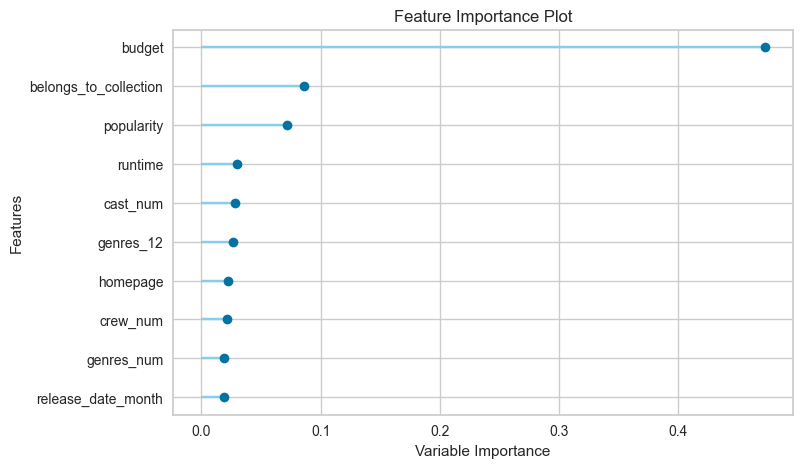

In [4]:
plot_model(best, plot = 'feature')

In [5]:
best_model = create_model('et')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,45417251.3171,8050904797121574.0000,89726834.3202,0.5532,1.9208,23.6506
1,41346844.1389,5550377227686065.0000,74500853.8722,0.6128,2.9349,46605.5728
2,37905307.9435,5077709181952549.0000,71258046.4365,0.6663,2.3613,3984.0921
3,38055961.9884,4932208369447782.0000,70229682.9656,0.6718,3.0821,91940.7196
4,36449214.7114,4155460503339045.0000,64462861.4269,0.6497,2.8263,15645.8744
5,40768574.7826,5676726635035750.0000,75344055.0743,0.6537,2.6360,81074.7799
6,40451207.0278,7659662111200775.0000,87519495.6064,0.6038,2.7674,4557.5533
7,34389513.7437,3653980816803533.0000,60448166.3643,0.6675,2.7436,33359.9183
8,49564218.2766,11572448900978200.0000,107575317.3408,0.5855,3.0638,42811.2029


In [6]:
testing["release_date"]

0      2007-07-14
1      1958-05-19
2      1997-05-23
3      2010-09-04
4      2005-02-11
          ...    
4393   2001-08-03
4394   2004-08-20
4395   1982-12-08
4396   2015-02-04
4397   1962-09-20
Name: release_date, Length: 4398, dtype: datetime64[ns]

In [10]:
testing.loc[testing['id'] == 3829,'release_date'] = testing['release_date'][0]


In [11]:
testing.isna().sum()

id                          0
belongs_to_collection       0
budget                      0
genres_num                  0
homepage                    0
original_language           0
overview                    0
popularity                  0
production_companies_num    0
production_countries_num    0
release_date                0
runtime                     0
spoken_languages_num        0
tagline                     0
Keywords_num                0
cast_num                    0
crew_num                    0
genres_10402                0
genres_10749                0
genres_10751                0
genres_10752                0
genres_10769                0
genres_12                   0
genres_14                   0
genres_16                   0
genres_18                   0
genres_27                   0
genres_28                   0
genres_35                   0
genres_36                   0
genres_37                   0
genres_53                   0
genres_80                   0
genres_878

In [12]:
predictions = predict_model(best_model, data=testing)


In [19]:
predictions
predictions.head()
final=predictions[["id", "prediction_label"]]
final.head()


,id,prediction_label
0,3001,28959606.28
1,3002,11252140.91
2,3003,13146775.84
3,3004,70689312.76
4,3005,10583012.04


In [25]:
import os
current_dir= os.getcwd()
filename='rishi_submission.csv'
file_path= os.path.join(current_dir, filename)
final=final.rename(columns={'prediction_label': 'revenue'})

#final.to_csv(file_path,index=False)